In [1]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import copy
from sqlalchemy import types,create_engine

In [2]:
#import the dataset

df_electricity = pd.read_csv("./global-data-on-sustainable-energy.csv")
df_electricity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [8]:
#Create normalized model to db

df_country = df_electricity['Entity'].drop_duplicates().reset_index()
df_country_loc = df_electricity.loc[:,['Land Area(Km2)','Latitude','Longitude','Entity']].drop_duplicates().reset_index()
df_elec_values = pd.merge(df_country,df_electricity, on='Entity')
df_elec_values = df_elec_values.drop(columns=['Entity','Land Area(Km2)','Latitude','Longitude'])

In [9]:
#Renaming

df_country = df_country.rename(columns={'index': 'Country_ID', 'Entity': 'Country'})
df_country_loc = df_country_loc.rename(columns={'index': 'Country_ID', 'Entity': 'Country'})
df_elec_values = df_elec_values.rename(columns={'index':'Country_ID'})

In [ ]:
#Create db to power bi

engine = create_engine("sqlite:///C:\\Users\\jcarl\\Final_Project\\db\\electry_values2.db", echo=True)
                                                          
df_country_loc.to_sql(name='elect_country_loc', con=engine, dtype={"Country_ID":types.Integer()})

df_elec_values.to_sql(name='electricity_values', con=engine, dtype={"Country_ID":types.Integer(),
                                                                   "Year": types.Integer(),
                                                                   "Access to electricity (% of population)": types.Float(),
                                                                   "Access to clean fuels for cooking": types.Float(),
                                                                   "Renewable-electricity-generating-capacity-per-capita": types.Float(),
                                                                   "Financial flows to developing countries (US $)": types.Float(),
                                                                   "Renewable energy share in the total final energy consumption (%)": types.Float(),
                                                                   "Electricity from fossil fuels (TWh)": types.Float(),
                                                                   "Electricity from nuclear (TWh)": types.Float(),
                                                                   "Electricity from renewables (TWh)": types.Float(),
                                                                   "Low-carbon electricity (% electricity)": types.Float(),
                                                                   "Primary energy consumption per capita (kWh/person)": types.Float(),
                                                                   "Energy intensity level of primary energy (MJ/$2017 PPP GDP)": types.Float(),
                                                                   "Renewables (% equivalent primary energy)": types.Float(),
                                                                   "gdp_growth": types.Float(),
                                                                   "gdp_per_capita": types.Float()})

In [12]:
#calculate some metrics

df_electricity.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


In [13]:
#Rename some columns

df_electricity = df_electricity.rename(columns={'Entity':'Country', 'Value_co2_emissions_kt_by_country':'CO2'})
df_electricity

,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [20]:
#electricity for each country

df_fossil = df_electricity.groupby('Country')['Electricity from fossil fuels (TWh)'].sum()

df_nuclear = df_electricity.groupby('Country')['Electricity from nuclear (TWh)'].sum()

df_renewal = df_electricity.groupby('Country')['Electricity from renewables (TWh)'].sum()

df_fossil.head()

Country
Afghanistan             4
Albania                 1
Algeria               985
Angola                 43
Antigua and Barbuda     6
Name: Electricity from fossil fuels (TWh), dtype: float64

In [21]:
def max_p(values, k):
    """
    Given a list of values and `k` bins,
    returns a list of their Maximum P bin number.
    """
    from mapclassify import MaxP

    binning = MaxP(values, k=k)
    return binning.yb

C:\Users\jcarl\AppData\Local\Temp\ipykernel_20396\3226413085.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\jcarl\anaconda3\Lib\site-packages\shapely\measurement.py:106: RuntimeWarning: invalid value encountered in bounds
  return lib.bounds(geometry_arr, out=out, **kwargs)


<Axes: >

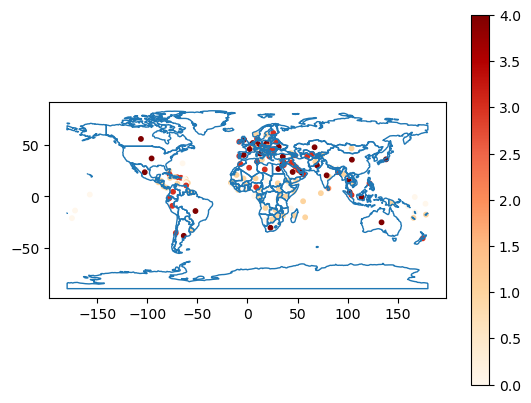

In [22]:
#map for fossil usage
df_combined_fossil = pd.merge(df_fossil, df_electricity[['Country', 'Longitude', 'Latitude']].drop_duplicates(), on='Country')
geometry = gpd.points_from_xy(df_combined_fossil['Longitude'], df_combined_fossil['Latitude'])
gdf = gpd.GeoDataFrame(df_combined_fossil, geometry=geometry, crs="EPSG:4326")
gdf["Max_P"] = max_p(gdf["Electricity from fossil fuels (TWh)"].values, k=5)

fig, ax = plt.subplots(figure=(50,50))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1)

gdf.plot(column = 'Max_P',ax=ax,cmap="OrRd", markersize=10, legend=True)

C:\Users\jcarl\AppData\Local\Temp\ipykernel_20396\3828990036.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\jcarl\anaconda3\Lib\site-packages\shapely\measurement.py:106: RuntimeWarning: invalid value encountered in bounds
  return lib.bounds(geometry_arr, out=out, **kwargs)


<Axes: >

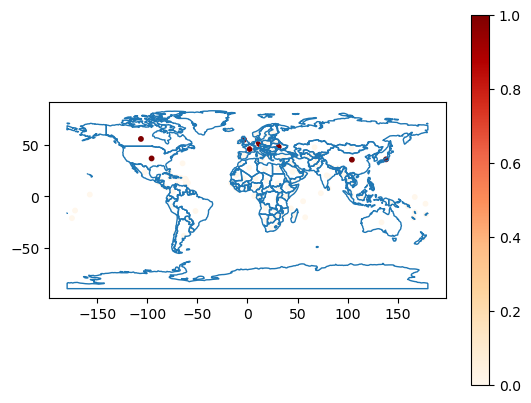

In [23]:
#map for nuclear usage
df_combined_nuclear = pd.merge(df_nuclear, df_electricity[['Country', 'Longitude', 'Latitude']].drop_duplicates(), on='Country')
geometry = gpd.points_from_xy(df_combined_nuclear['Longitude'], df_combined_nuclear['Latitude'])
gdf = gpd.GeoDataFrame(df_combined_nuclear, geometry=geometry, crs="EPSG:4326")
gdf["Max_P"] = max_p(gdf["Electricity from nuclear (TWh)"].values, k=2)

fig, ax = plt.subplots(figure=(50,50))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1)

gdf.plot(column = 'Max_P',ax=ax,cmap="OrRd", markersize=10, legend=True)

C:\Users\jcarl\AppData\Local\Temp\ipykernel_20396\1458116516.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\jcarl\anaconda3\Lib\site-packages\shapely\measurement.py:106: RuntimeWarning: invalid value encountered in bounds
  return lib.bounds(geometry_arr, out=out, **kwargs)


<Axes: >

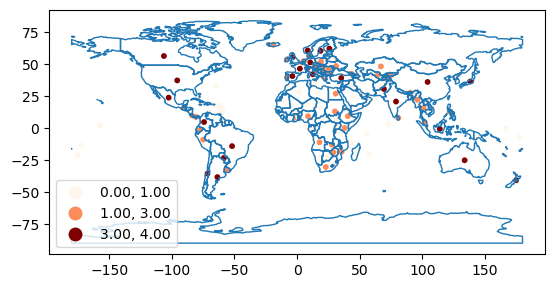

In [24]:
#map for renewable usage
df_combined_renewal = pd.merge(df_renewal, df_electricity[['Country', 'Longitude', 'Latitude']].drop_duplicates(), on='Country')
geometry = gpd.points_from_xy(df_combined_renewal['Longitude'], df_combined_renewal['Latitude'])
gdf = gpd.GeoDataFrame(df_combined_renewal, geometry=geometry, crs="EPSG:4326")
gdf["Max_P"] = max_p(gdf["Electricity from renewables (TWh)"].values, k=5)

fig, ax = plt.subplots(figure=(50,50))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1)

gdf.plot(column = 'Max_P',ax=ax,cmap="OrRd",scheme="quantiles", k=3, markersize=10, legend=True)

C:\Users\jcarl\AppData\Local\Temp\ipykernel_20396\1774845057.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\jcarl\AppData\Local\Temp\ipykernel_20396\1774845057.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


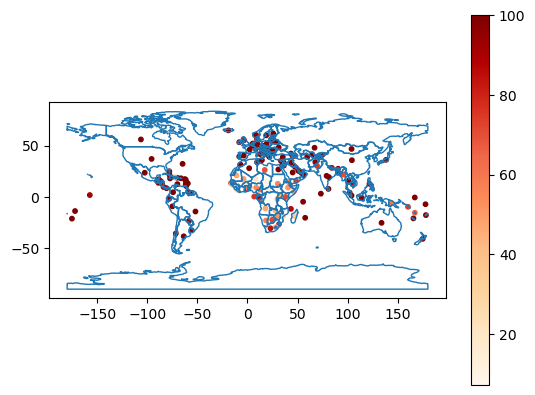

In [25]:
#Map for access to electricity in 2020

df_2020 = df_electricity[df_electricity['Year'] == 2020]

geometry = gpd.points_from_xy(df_2020['Longitude'], df_2020['Latitude'])
gdf = gpd.GeoDataFrame(df_2020, geometry=geometry, crs="EPSG:4326")

fig, ax = plt.subplots(figure=(10,10))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1)

gdf.plot(column = 'Access to electricity (% of population)',ax=ax,cmap="OrRd", markersize=10, legend=True)
fig.show()



C:\Users\jcarl\AppData\Local\Temp\ipykernel_20396\2133384435.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\jcarl\anaconda3\Lib\site-packages\shapely\measurement.py:106: RuntimeWarning: invalid value encountered in bounds
  return lib.bounds(geometry_arr, out=out, **kwargs)
C:\Users\jcarl\anaconda3\Lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


<Axes: >

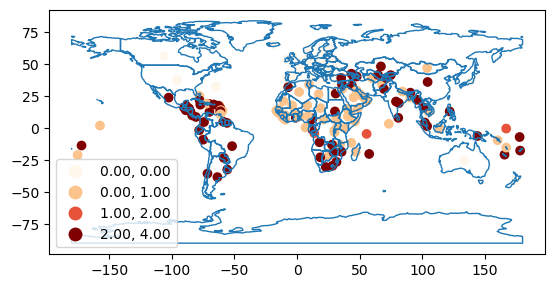

In [26]:
#Map for renewal genearating capacity

df_rew_capacity = df_electricity.groupby('Country')['Renewable-electricity-generating-capacity-per-capita'].sum()

df_combined_capacity = pd.merge(df_rew_capacity, df_electricity[['Country', 'Longitude', 'Latitude']].drop_duplicates(), on='Country')

geometry = gpd.points_from_xy(df_combined_capacity['Longitude'], df_combined_capacity['Latitude'])
gdf = gpd.GeoDataFrame(df_combined_capacity, geometry=geometry, crs="EPSG:4326")
gdf["Max_P"] = max_p(gdf["Renewable-electricity-generating-capacity-per-capita"].values, k=5)

fig, ax = plt.subplots(figure=(50,50))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1)

gdf.plot(column = 'Max_P',ax=ax,cmap="OrRd",scheme='quantiles', legend=True)


([<matplotlib.patches.Wedge at 0x10d8e0dc190>,
 [Text(-0.22988885144805624, -1.075709587193446, 'Electricity from fossil fuels (TWh)'),
  Text(0.8695854557371102, 0.6736624786719848, 'Electricity from nuclear (TWh)'),
  Text(-0.1877580198610805, 1.0838574288059506, 'Electricity from renewables (TWh)')],
 [Text(-0.12539391897166702, -0.5867506839236977, '65.5%'),
  Text(0.47431933949296917, 0.36745226109380985, '12.2%'),
  Text(-0.10241346537877118, 0.5911949611668821, '22.3%')])

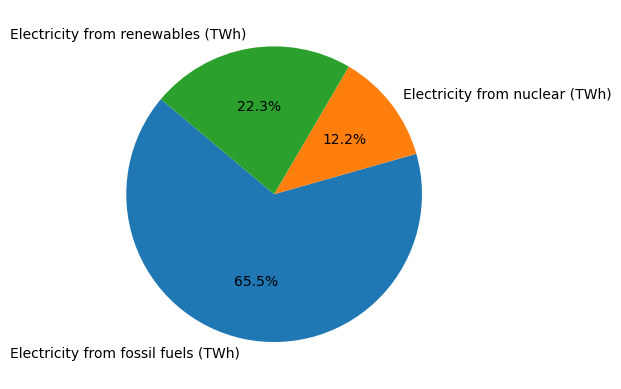

In [27]:
#Main sources of electricity globally

df_agg = df_electricity.groupby('Country').agg({
    'Electricity from fossil fuels (TWh)': 'sum',
    'Electricity from nuclear (TWh)': 'sum',
    'Electricity from renewables (TWh)': 'sum'
}).reset_index()
df_melted = df_agg.melt(id_vars='Country', var_name='Source', value_name='Electricity (TWh)')

global_energy = df_melted.groupby('Source')['Electricity (TWh)'].sum()
fig, ax = plt.subplots()
plt.pie(global_energy, labels=global_energy.index, autopct='%1.1f%%', startangle=140)

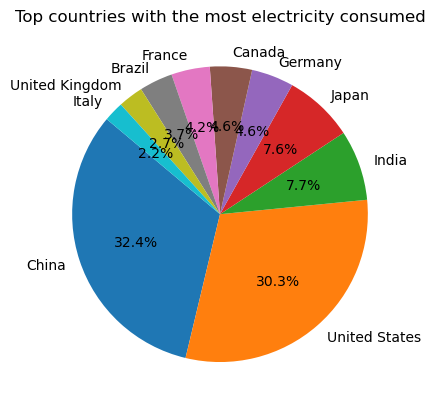

In [28]:
#Countries with the most electricity consumed

global_energy2 = df_melted.groupby('Country')['Electricity (TWh)'].sum().sort_values(ascending=False)
top_countries = global_energy2.head(10)
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top countries with the most electricity consumed')
plt.show()

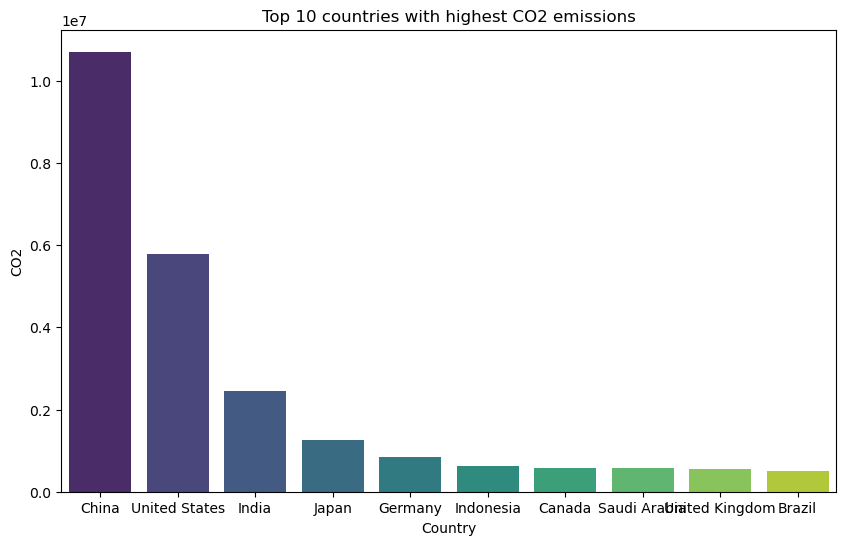

In [29]:
#Countries with highest CO2 emission

co2 = df_electricity.groupby('Country')['CO2'].max().reset_index()
co2 = co2.sort_values(by='CO2',ascending=False)
topco2 = co2.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=topco2['Country'], y=topco2['CO2'], palette='viridis')
plt.title('Top 10 countries with highest CO2 emissions')
plt.show()

C:\Users\jcarl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jcarl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jcarl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\jcarl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

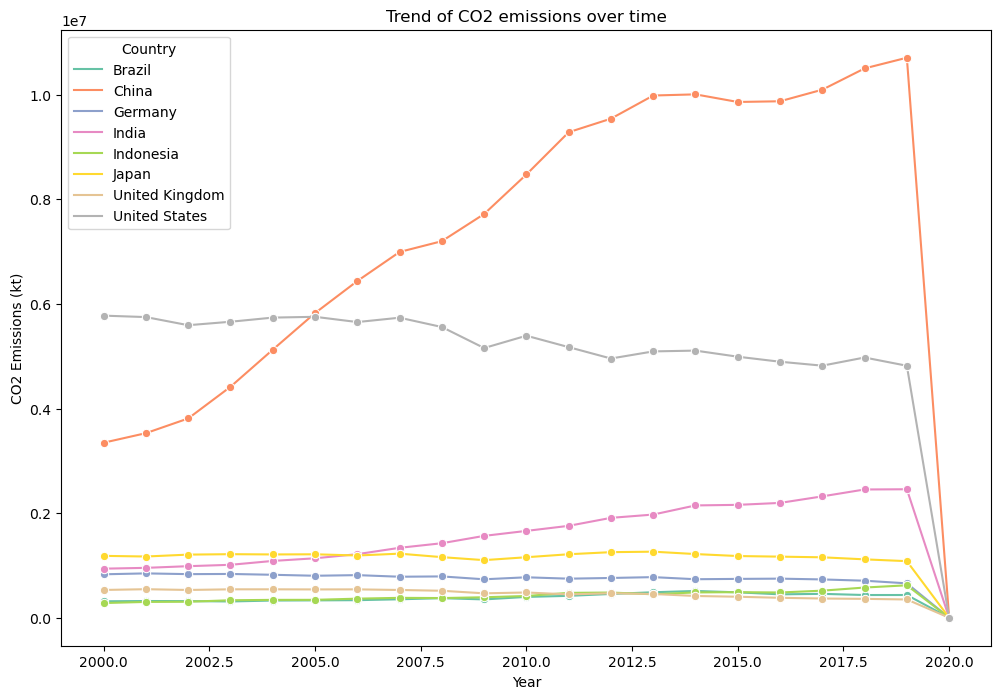

In [30]:
#CO2 Trend over time
df_copy = copy.deepcopy(df_electricity)
# Filter the data for the specified countries
selected_countries = ['Brazil', 'India', 'China', 'Indonesia', 'United States','Japan','Germany','United Kingdom']
selected_data = df_copy[df_copy['Country'].isin(selected_countries)]

# Create line plots for CO2 emissions over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='CO2', hue='Country', palette='Set2' ,data=selected_data, marker='o')
plt.title('Trend of CO2 emissions over time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.legend(title='Country')
plt.show()

C:\Users\jcarl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jcarl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jcarl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jcarl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

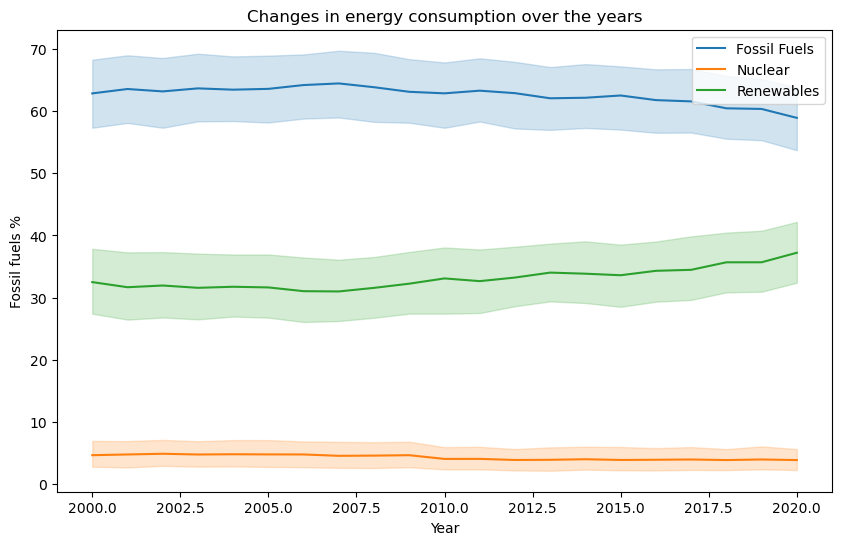

In [31]:
#Changes in energy consumption over the years

#Create new column from the total

df_copy['Total Electricity (Twh)'] = df_copy['Electricity from fossil fuels (TWh)'] + df_copy['Electricity from nuclear (TWh)'] + df_copy['Electricity from renewables (TWh)']

#Calculate the percentage of each energy source

df_copy['Fossil fuels %'] = (df_copy['Electricity from fossil fuels (TWh)'] / df_copy['Total Electricity (Twh)']) * 100
df_copy['Nuclear %'] = (df_copy['Electricity from nuclear (TWh)'] / df_copy['Total Electricity (Twh)']) * 100
df_copy['Renewables %'] = (df_copy['Electricity from renewables (TWh)'] / df_copy['Total Electricity (Twh)']) * 100

#plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Fossil fuels %', label='Fossil Fuels', data=df_copy)
sns.lineplot(x='Year', y='Nuclear %', label='Nuclear', data=df_copy)
sns.lineplot(x='Year', y='Renewables %', label='Renewables', data=df_copy)
plt.title('Changes in energy consumption over the years')
plt.show()

C:\Users\jcarl\AppData\Local\Temp\ipykernel_20396\1572427948.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(top_transitioned_countries, x='Country', weights='Renewables Change %', palette='viridis', kde=False, multiple="stack")
C:\Users\jcarl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


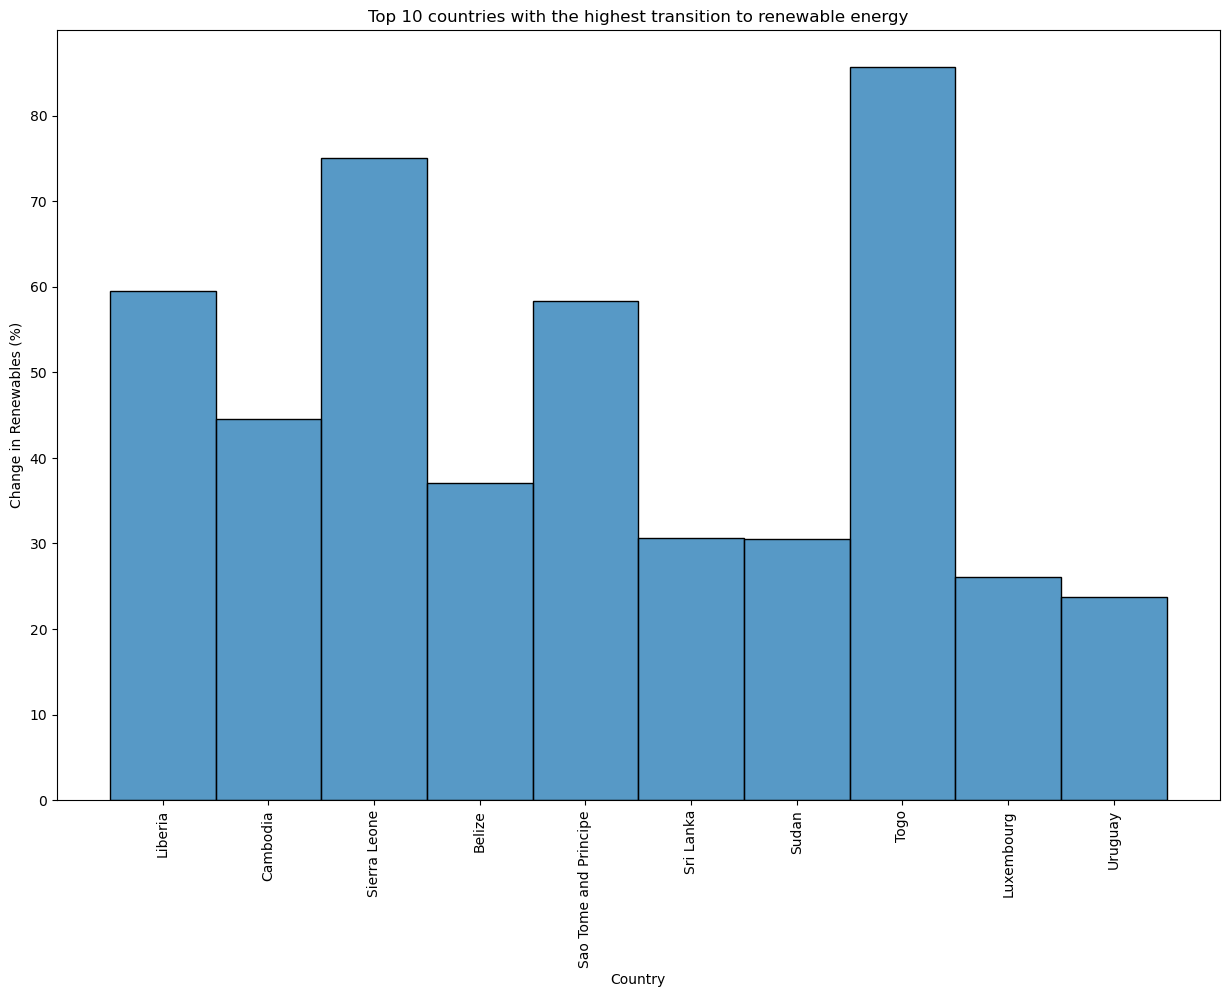

In [41]:
# Top countries with the highest transition to renewable energy
df = df_copy.sort_values(['Country', 'Year'])
df['Renewables Change %'] = df.groupby('Country')['Renewables %'].diff()

# Identify countries that have transitioned to a higher percentage of renewable energy
transitioned_countries = df.dropna(subset=['Renewables Change %']).sort_values('Renewables Change %', ascending=False)
top_transitioned_countries = transitioned_countries.head(14)

#Plot it
plt.figure(figsize=(15, 10))
sns.histplot(top_transitioned_countries, x='Country', weights='Renewables Change %', palette='viridis', kde=False, multiple="stack")
plt.title('Top 10 countries with the highest transition to renewable energy')
plt.xlabel('Country')
plt.ylabel('Change in Renewables (%)')
plt.xticks(rotation=90)
plt.show()
